In [1]:

# Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm

C:\Users\Gillu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the csv file
data = pd.read_csv('ITSM_data.csv')

In [4]:
data.shape

(46606, 25)

In [5]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [6]:
noi = data.loc[:,['Incident_ID','Open_Time']]

In [7]:
noi.head()

,Incident_ID,Open_Time
0,IM0000004,5/2/2012 13:32
1,IM0000005,12/3/2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10/8/2012 11:01


In [8]:
# Coverting all the values in Datetime format

for i in range(len(noi.Open_Time)):
    if (noi.Open_Time[i][1]=='/'):
        noi.Open_Time[i] = dt.datetime.strptime(noi.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (noi.Open_Time[i][2]=='/'):
        noi.Open_Time[i] = dt.datetime.strptime(noi.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        noi.Open_Time[i] = dt.datetime.strptime(noi.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [9]:
noi.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [10]:

# Adding a new column which will have the number of tickets per day
noi['No_Incidents'] = noi.groupby('Open_Time')['Incident_ID'].transform('count')

In [11]:
noi.drop(['Incident_ID'],axis=1,inplace=True)
noi.drop_duplicates(inplace=True)

In [12]:

noi.head(5)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [13]:
# Setting Date as the Index

noi = noi.set_index('Open_Time')
noi.index = pd.to_datetime(noi.index)
noi.index


DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [14]:
# Converting TimeSeries to specified frequency as Day
data1 = noi['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

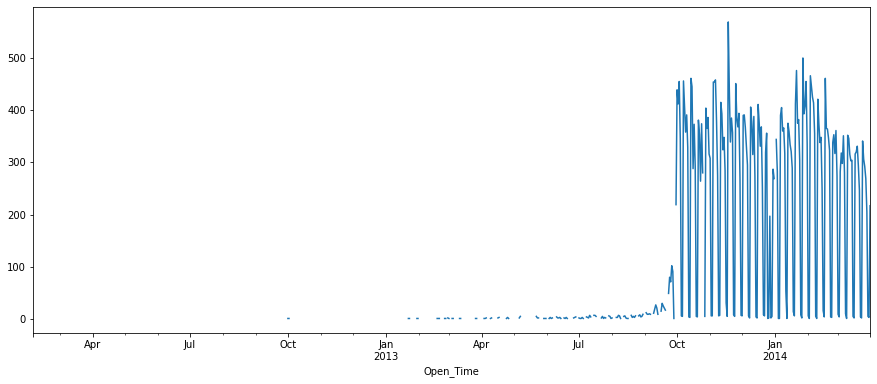

In [15]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [16]:
# Since not many tickets before October 2013, we consider values after October 2013
new_noi = noi[noi.index > dt.datetime(2013,10,1)]

In [17]:
# Convert TimeSeries to specified frequency as Day
data2 = new_noi['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

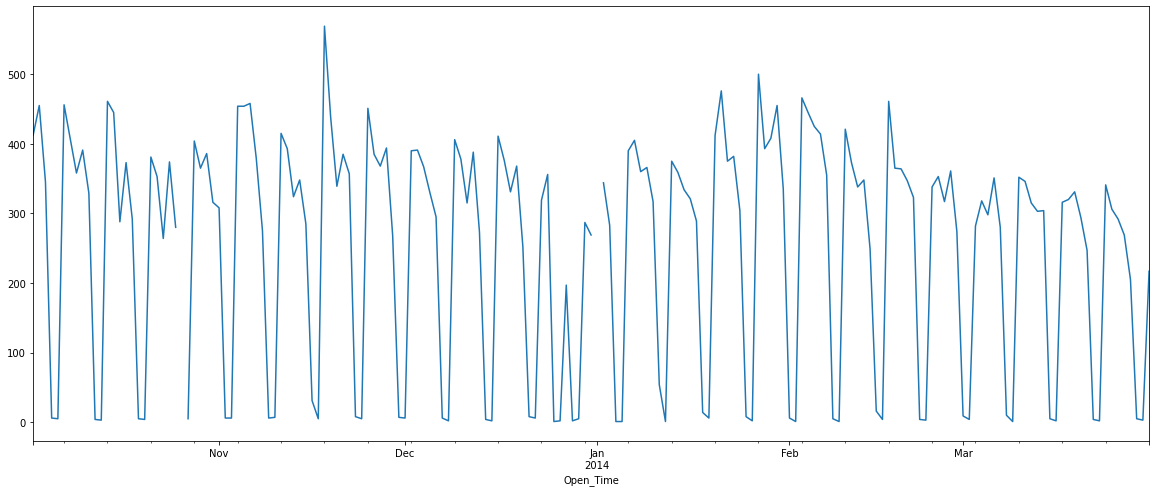

In [18]:
# Plotting number of incidents per day after October 2013
data2.plot(figsize=(20,8))
plt.show()

In [19]:
# list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [20]:
# Checking the AIC values 
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472282
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363339777845
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.312508693354
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.431581243679


In [21]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
model = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.723      2.576      0.010    6023.530    4.44e+04


In [30]:
# Predicting the future values 
future_values = results.get_prediction(start=pd.to_datetime('2014-1-3'),end=pd.to_datetime('2014-12-30'),dynamic=False)
predicted = future_values.conf_int()
future_values.predicted_mean.round()

2014-01-03    287.0
2014-01-04    266.0
2014-01-05    168.0
2014-01-06    166.0
2014-01-07    300.0
              ...  
2014-12-26    252.0
2014-12-27    252.0
2014-12-28    252.0
2014-12-29    252.0
2014-12-30    252.0
Freq: D, Length: 362, dtype: float64

# Visualization of data

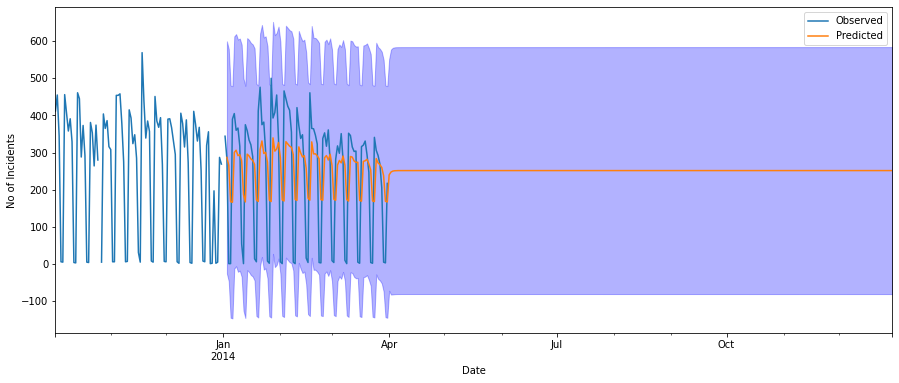

In [31]:
ax = data2['2013':].plot(label='Observed')
future_values.predicted_mean.plot(ax=ax,label='Predicted',figsize=(15, 6))
ax.fill_between(predicted.index,predicted.iloc[:,0],predicted.iloc[:,1],color='blue',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()